# Modelling via scikit-learn

This notebook performs model fitting and evaluating on hold out areas, using models from scikit-learn.

## Imports and Setup

In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from math import sqrt
import pathlib
import os
from sklearn.externals import joblib

from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.reset_option('^display')

# ignore warnings
import logging
import warnings
logging.getLogger().setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

import sys
sys.path.insert(0, '../utils')
import modelutils
from settings import *

## File Locations

In [6]:
dirs = [model_dir, scaler_dir, preds_dir]
for dir_ in dirs:
    with pathlib.Path(dir_) as path:
        if not path.exists():
            path.mkdir(parents=True, exist_ok=True)

## Load Data

In [7]:
# !gsutil cp gs://immap-wash-training/training/20200916_*.csv {data_dir}
df = pd.read_csv(data_dir + '20200916_dataset.csv')
df['population'] = df['population'].fillna(0)
df = df.dropna().reset_index(drop = True)
df.shape

(57036, 45)

## Fit, Predict and Evaluate Models Using 5-fold Cross Validation
Trains a random forest model to predict each of the 3 WASH indicators, setting random 20% of the data (whichever the area) as test data and everything else as training data. The train-test split is done for 5 different folds.

### Using Both Urban and Rural Dataset


Access to water

Average Metrics
correlation: 0.4663
r2: 0.3169
rmse: 0.2082


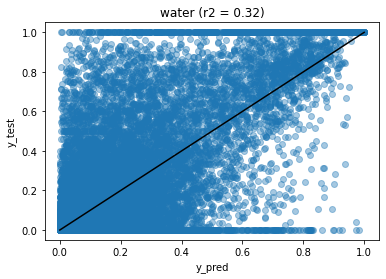


Access to toilet

Average Metrics
correlation: 0.2865
r2: 0.2025
rmse: 0.1977


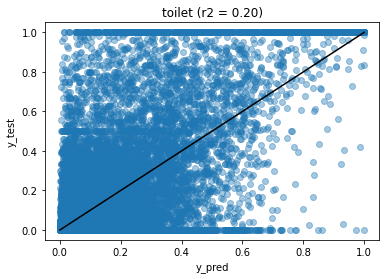


Access to sewage

Average Metrics
correlation: 0.3963
r2: 0.3107
rmse: 0.2413


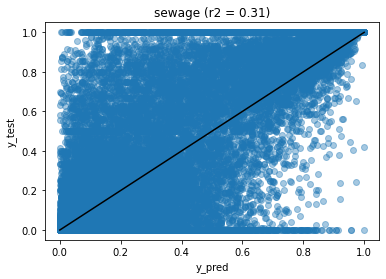

In [9]:
# from sklearn.ensemble import RandomForestRegressor
# clf = RandomForestRegressor(random_state=42)

# res = modelutils.fit_with_randomsplit(df, clf, features, indicators, scale = True, n_splits = 5, prefix = 'all_250mv2')
res = pd.read_csv(data_dir + 'all_250mv2_randomsplit_results.csv')
modelutils.summarize_metrics(res, iterate_over = 'split_id', prefix = 'all_250mv2')